In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Kor_income.csv')
cpi_df = pd.read_excel('Kor_cpi.xlsx')

# 전처리 진행

In [3]:
#필요없는 칼럼 삭제
del df['Unnamed: 0']
del df['id']
del df['wave']
del df['religion']
#year age로 바꾸기
df['year_born'] = df['year']-df['year_born']+1
df.rename(columns={'year_born' : 'age'}, inplace = True)

In [4]:
cpi_df.rename(columns={'소비자물가 총지수(2020=100)' : 'cpi'}, inplace = True)
#통계청 자료 전처리
cpi_df = cpi_df.iloc[[1, 2], :]
cpi_df = cpi_df.dropna(axis=1)
cpi_df = cpi_df.T
cpi_df = cpi_df.reset_index(drop=True)
cpi_df.columns = ["year", "cpi"]
cpi_df['year'] = cpi_df['year'].astype(int)
cpi_df['cpi'] = cpi_df['cpi'].astype(float)

In [5]:
cpi_dict = cpi_df.set_index('year')['cpi'].to_dict()
# 인플레이션 적용
cpi_2020 = 100.0 #기준

# 인플레이션 데이터를 딕셔너리 형태로 변환
cpi_dict = dict(zip(cpi_df["year"], cpi_df["cpi"]))

# 인플레이션을 고려해 income 데이터를 수정
for index, row in df.iterrows():
    year = row["year"]
    income = row["income"]
    inflation_rate = cpi_2020 / cpi_dict[year]
    df.at[index, "income"] = income * inflation_rate

#income 최저를 0으로.
df=df[df['income']>=0]
df['income'].min()

0.0

<AxesSubplot:ylabel='income'>

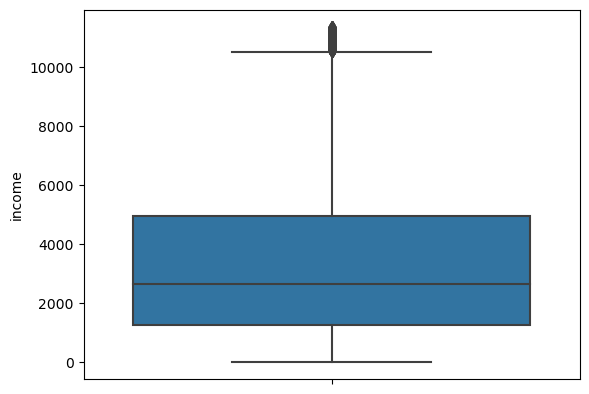

In [6]:
#이상치 정리
Q1 = df['income'].quantile(0.25) #income에서 1분위 계산
Q3 = df['income'].quantile(0.75) #income에서 3분위 계산
IQR = Q3 - Q1
df = df[(df['income'] >= Q1 - 1.5*IQR) & (df['income'] <= Q3 + 1.5*IQR)] #이상치 제거 진행

sns.boxplot(x=None, y="income", data=df)

In [7]:
#20살 이하 미성년자 계층 삭제
#del df[df['age']<20]


In [8]:
#공백을 결측치로
df.replace(' ', np.nan, inplace=True)

In [9]:
#occupation 정리
df.drop(df[df['occupation'] == 9999].index, inplace=True)
df['occupation'] = df['occupation'].str[0]
df['occupation'].unique()

array(['6', nan, '5', '9', '2', '8', '4', '7', '3', '1'], dtype=object)

# AGE와의 관계를 보기 위한 추가적인 데이터 분석

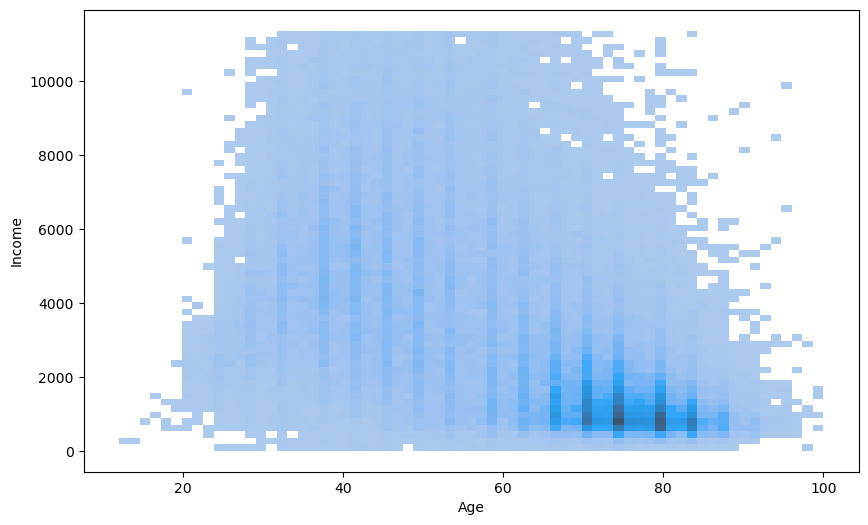

In [10]:
#나이
plt.figure(figsize=(10, 6))
sns.histplot(x='age', y='income', data=df)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


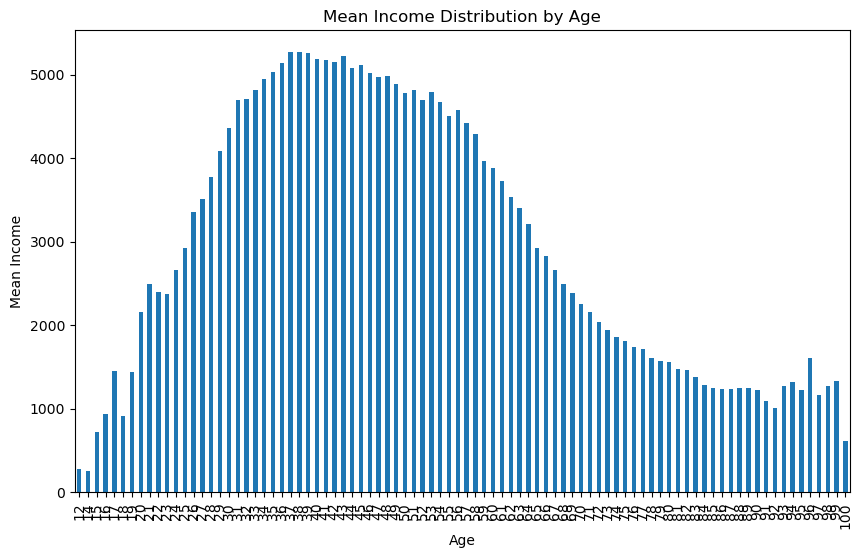

In [11]:
mean_income_by_age = df.groupby('age')['income'].mean()

plt.figure(figsize=(10, 6))
mean_income_by_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Mean Income')
plt.title('Mean Income Distribution by Age')
plt.show()

## 통계청이나 기타 소득 관련 데이터를 기반으로 label 부여

In [12]:
age_ranges = [19, 25, 30, 35, 40, 50, 60, np.inf]
age_labels = ['19-24', '25-29', '30-34', '35-39', '40-49', '50-59', '60+']

df['age'] = pd.cut(df['age'], bins=age_ranges, labels=age_labels, right=False)

In [13]:
#marriage 처리
df.drop(df[df['marriage'] == 9].index, inplace=True)
df.drop(df[df['marriage'] == 0].index, inplace=True)

In [14]:
df[(df['marriage']==1)] ##왜???? 기타에 분류???

,year,region,family_member,gender,age,education_level,marriage,occupation,company_size,reason_none_worker,income
1,2018,4,3,1,60+,5,1,NaN,NaN,9,1728.557013
3,2011,4,5,1,60+,3,1,6,1,NaN,4771.968854
4,2017,4,2,1,60+,2,1,NaN,NaN,10,1647.540984
5,2007,3,3,1,60+,4,1,9,3,NaN,1925.641026
6,2005,2,2,1,60+,5,1,NaN,NaN,NaN,2469.086022
...,...,...,...,...,...,...,...,...,...,...,...
78921,2018,4,2,1,60+,4,1,6,1,NaN,3757.820383
78923,2007,2,4,1,40-49,5,1,9,5,NaN,7512.820513
78924,2006,2,4,1,35-39,5,1,5,2,NaN,4919.842313
78925,2006,2,4,1,60+,2,1,NaN,NaN,7,3728.569271


In [15]:
df[df['marriage']==5]

,year,region,family_member,gender,age,education_level,marriage,occupation,company_size,reason_none_worker,income
8,2016,3,3,1,50-59,7,5,NaN,NaN,NaN,1638.830898
42,2018,1,2,1,50-59,4,5,7,1,NaN,3214.934410
61,2014,3,1,1,25-29,7,5,3,10,NaN,4509.554140
92,2005,5,1,1,25-29,6,5,9,2,NaN,2799.731183
97,2010,3,2,1,50-59,5,5,6,1,NaN,1525.462963
...,...,...,...,...,...,...,...,...,...,...,...
78890,2015,4,2,2,25-29,6,5,2,3,NaN,3236.037935
78892,2011,5,2,1,30-34,6,5,9,3,NaN,6516.129032
78900,2010,6,2,1,40-49,5,5,6,1,NaN,1221.064815
78904,2009,7,1,1,19-24,7,5,5,1,NaN,2016.686532


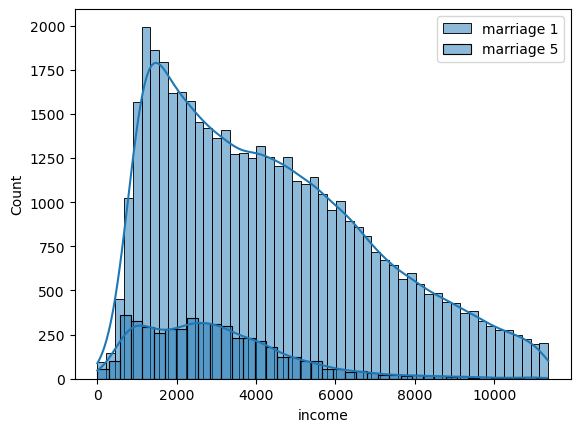

In [16]:
income_1 = df[df['marriage'] == 1]['income']
income_5 = df[df['marriage'] == 5]['income']

sns.histplot(income_1, kde=True, label='marriage 1')
sns.histplot(income_5, kde=True, label='marriage 5')
plt.legend()
plt.show()

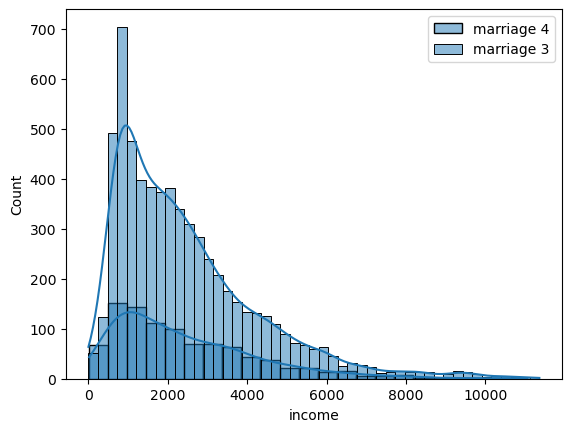

In [17]:
income_4 = df[df['marriage'] == 4]['income']
income_3 = df[df['marriage'] == 3]['income']

sns.histplot(income_4, kde=True, label='marriage 4')
sns.histplot(income_3, kde=True, label='marriage 3')
plt.legend()
plt.show()

In [18]:
df['marriage'].replace({4:3}, inplace = True)
df['marriage'].unique()

array([2, 1, 3, 5, 6], dtype=int64)

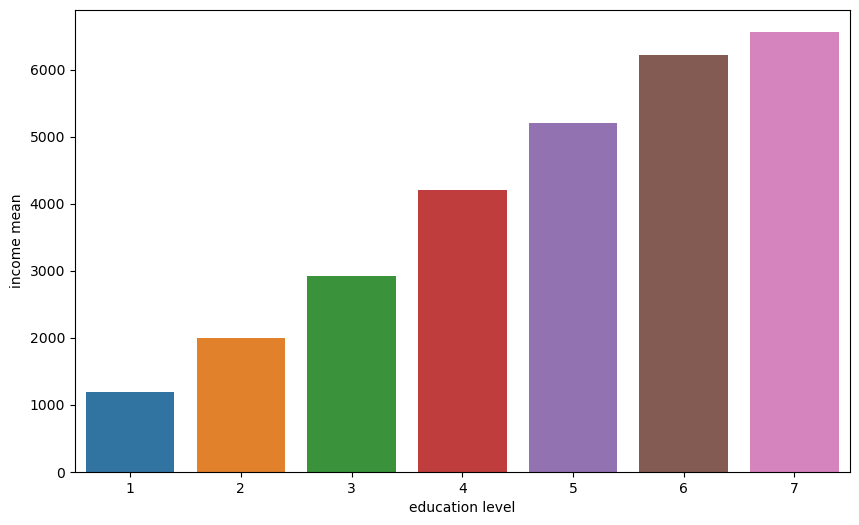

In [19]:
#education level 정리
df['education_level'] = df['education_level'].replace({7:6})
df['education_level'] = df['education_level'].replace({2:1, 3:2, 4:3, 5:4, 6:5, 8:6, 9:7})
plt.figure(figsize=(10, 6))
sns.barplot(x='education_level', y='income', data=df, ci=None)
plt.xlabel('education level')
plt.ylabel('income mean')
plt.show()

In [20]:
#region 정리 (수도권/지방권)
df['region'] = df['region'].apply(lambda x: 1 if int(x) in [1,2] else 0)

## 무직자/재직자 따로 데이터 전처리

In [21]:
#재직자 데이터 프레임 따로 제작
df_w = df[(~df['occupation'].isna()) & (df['reason_none_worker'].isna())]
del df_w['reason_none_worker']
del df_w['year']

In [22]:
#company size 정리
df_w['company_size'] = df_w['company_size'].astype('int')
throw_index = df_w[df_w['company_size']==99].index
df_w = df_w.drop(throw_index)
df_w['company_size'].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_12980\1424741759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['company_size'] = df_w['company_size'].astype('int')


array([ 1,  3, 10,  9,  2,  7, 11,  4,  6,  8,  5])

In [23]:
df_w[df_w['company_size']==11]

,region,family_member,gender,age,education_level,marriage,occupation,company_size,income
39,1,4,1,50-59,2,1,9,11,6684.027778
268,1,3,1,40-49,4,2,5,11,2392.473118
296,0,4,1,40-49,5,1,9,11,2295.663601
563,1,2,1,60+,4,1,7,11,5230.070636
569,0,1,1,25-29,5,5,9,11,3387.096774
...,...,...,...,...,...,...,...,...,...
78192,0,2,1,60+,2,1,9,11,1637.096774
78484,0,2,1,30-34,4,1,9,11,4623.655914
78514,0,2,2,60+,2,3,4,11,1888.888889
78630,0,4,1,40-49,4,1,6,11,8115.468410


In [24]:
mean_income = df_w.groupby('company_size')['income'].mean()
std_income = df_w.groupby('company_size')['income'].std()

table = pd.DataFrame({'mean income': mean_income, 'std': std_income})
table.index.name = 'company Size'
table.reset_index(inplace=True)
table

table = table.sort_values(by='mean income', ascending=True)
table

,company Size,mean income,std
10,11,3319.100588,2167.052371
0,1,3551.439982,2397.457282
1,2,4336.276510,2295.529424
2,3,4356.628041,2324.092528
3,4,4546.563885,2393.129926
5,6,4966.412129,2364.107158
4,5,4966.570594,2404.652396
6,7,5144.014160,2428.927959
7,8,5577.670364,2389.707170
8,9,6096.346111,2606.203546


# Company size에 대한 추가적인 데이터 분석

In [25]:
df_w['company_size'] = df_w['company_size'].replace({11: 1})

In [26]:
mean_income = df_w.groupby('company_size')['income'].mean()
std_income = df_w.groupby('company_size')['income'].std()

table = pd.DataFrame({'mean income': mean_income, 'std': std_income})
table.index.name = 'company Size'
table.reset_index(inplace=True)
table

table = table.sort_values(by='mean income', ascending=True)
table

,company Size,mean income,std
0,1,3548.200053,2394.510071
1,2,4336.276510,2295.529424
2,3,4356.628041,2324.092528
3,4,4546.563885,2393.129926
5,6,4966.412129,2364.107158
4,5,4966.570594,2404.652396
6,7,5144.014160,2428.927959
7,8,5577.670364,2389.707170
8,9,6096.346111,2606.203546
9,10,6847.511389,2405.697157


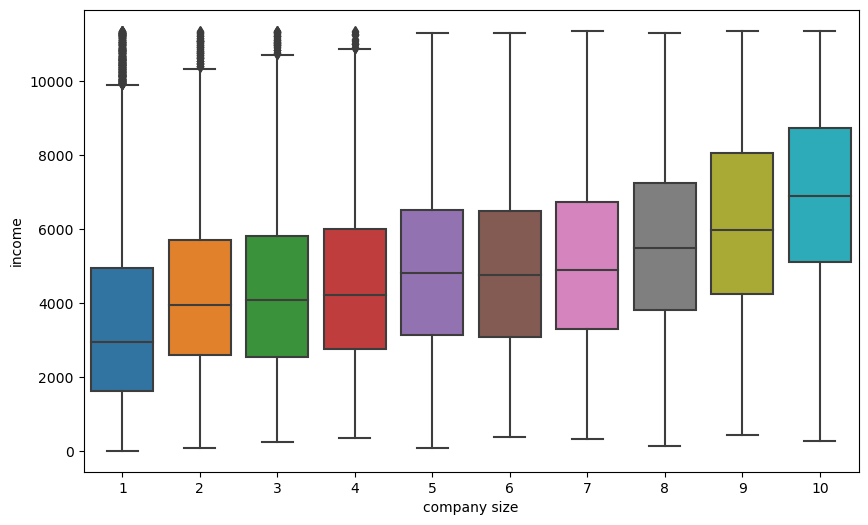

In [27]:
data = df_w[['company_size', 'income']]
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='income', data=data)
plt.xlabel('company size')
plt.ylabel('income')
plt.show()

## income과 company size 가 선형적인 관계라 생각하여 데이터 분류 재진행

In [28]:
def categorize_company_size(row):
    if row['income'] <= 4000:
        return 1
    elif row['income'] <= 4500:
        return 2
    elif row['income']<= 5000:
        return 3
    elif row['income']<=5500:
        return 4
    elif row['income']<=6000:
        return 5
    else:
        return 6

df_w['company_size'] = df_w.apply(categorize_company_size, axis=1)
df_w['company_size'] = df_w['company_size'].apply(pd.to_numeric)
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47326 entries, 0 to 78927
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   region           47326 non-null  int64   
 1   family_member    47326 non-null  int64   
 2   gender           47326 non-null  int64   
 3   age              47326 non-null  category
 4   education_level  47326 non-null  int64   
 5   marriage         47326 non-null  int64   
 6   occupation       47326 non-null  object  
 7   company_size     47326 non-null  int64   
 8   income           47326 non-null  float64 
dtypes: category(1), float64(1), int64(6), object(1)
memory usage: 3.3+ MB


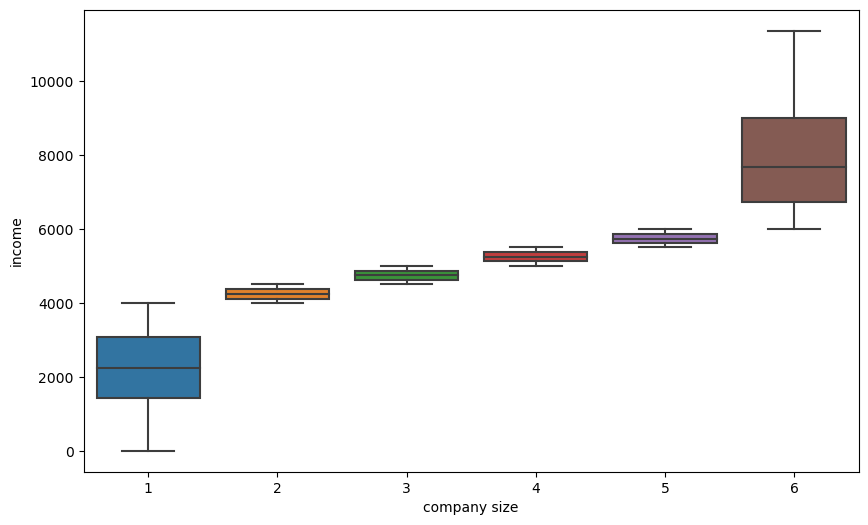

In [29]:
data = df_w[['company_size', 'income']]
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='income', data=data)
plt.xlabel('company size')
plt.ylabel('income')
plt.show()

In [30]:
df_w.loc[df['company_size']=="1"]

,region,family_member,gender,age,education_level,marriage,occupation,company_size,income
0,0,1,2,60+,1,2,6,1,618.279570
2,1,3,1,40-49,5,3,5,1,3108.932462
3,0,5,1,60+,2,1,6,3,4771.968854
11,0,2,1,60+,2,1,6,1,2521.681997
12,1,4,1,35-39,4,1,9,2,4327.886710
...,...,...,...,...,...,...,...,...,...
78901,0,4,1,40-49,5,1,2,3,4785.562633
78904,0,1,1,19-24,5,5,5,1,2016.686532
78912,1,4,1,50-59,4,1,8,4,5332.925337
78920,1,5,1,35-39,4,1,9,1,2096.774194


In [31]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47326 entries, 0 to 78927
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   region           47326 non-null  int64   
 1   family_member    47326 non-null  int64   
 2   gender           47326 non-null  int64   
 3   age              47326 non-null  category
 4   education_level  47326 non-null  int64   
 5   marriage         47326 non-null  int64   
 6   occupation       47326 non-null  object  
 7   company_size     47326 non-null  int64   
 8   income           47326 non-null  float64 
dtypes: category(1), float64(1), int64(6), object(1)
memory usage: 3.3+ MB


In [ ]:
#income mean에 따라 company_size 다시 나누고 소, 중 대 부여"?????
#grouped_data = data.groupby('company_size')['income'].agg(['mean', 'std'])

#mean_thresholds = [grouped_data['mean'].quantile(1/3), grouped_data['mean'].quantile(2/3)]
#std_thresholds = [grouped_data['std'].quantile(1/3), grouped_data['std'].quantile(2/3)]

#def categorize_company_size(row):
#    company_mean = grouped_data.loc[row['company_size'], 'mean']
#    company_std = grouped_data.loc[row['company_size'], 'std']
    
#    if row['income'] <= mean_thresholds[0] and row['income'] <= std_thresholds[0]:
#        return 'Small'
#    elif row['income'] > mean_thresholds[0] and row['income'] <= std_thresholds[1]:
#        return 'Medium'
#    else:
#        return 'Large'

#df_w['company_category'] = df_w.apply(categorize_company_size, axis=1)
#df_w.drop('company_size', axis=1, inplace=True)
#df_w

In [33]:
#무직자 데이터 프레임 따로 제작
df_n = df[(df['occupation'].isna()) & (~df['reason_none_worker'].isna())]
del df_n['occupation']
del df_n['company_size']
del df_n['year']

In [34]:
#reason_non_worker 정리
df_n.drop(df_n[df_n['reason_none_worker'] == '99'].index, inplace=True)
df_n.drop(df_n[df_n['reason_none_worker'] == '0'].index, inplace=True)
#수민 동호는 11개 전부 확인
df_n['reason_none_worker'].unique()
#민석 예진은 7,8번 합치고 확인
df_n['reason_none_worker'].replace({'8':'7'}, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12980\2179281990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.drop(df_n[df_n['reason_none_worker'] == '99'].index, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12980\2179281990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.drop(df_n[df_n['reason_none_worker'] == '0'].index, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12980\2179281990.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [35]:
df_n['reason_none_worker'].unique()

array(['9', '10', '4', '1', '7', '6', '5', '11', '2', '3'], dtype=object)

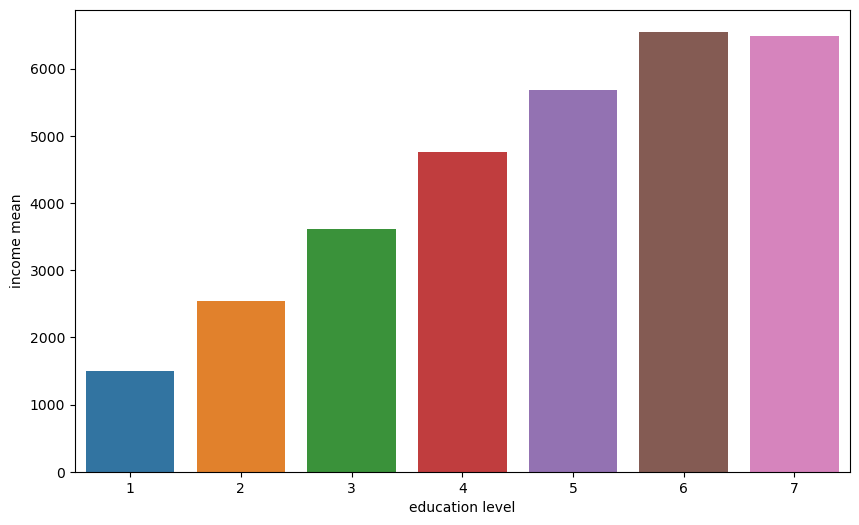

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education_level', y='income', data=df_w, ci=None)
plt.xlabel('education level')
plt.ylabel('income mean')
plt.show()

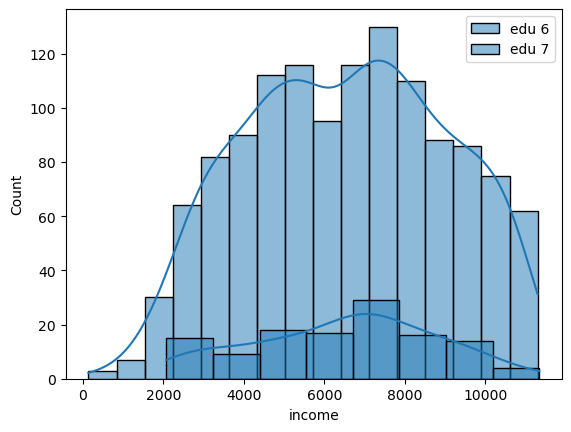

In [37]:
income_6 = df_w[df_w['education_level'] == 6]['income']
income_7 = df_w[df_w['education_level'] == 7]['income']

sns.histplot(income_6, kde=True, label='edu 6')
sns.histplot(income_7, kde=True, label='edu 7')
plt.legend()
plt.show()

In [38]:
df_w['education_level']=df_w['education_level'].replace({7:6})

In [39]:
df_w['education_level'].unique()

array([1, 5, 2, 3, 4, 6], dtype=int64)

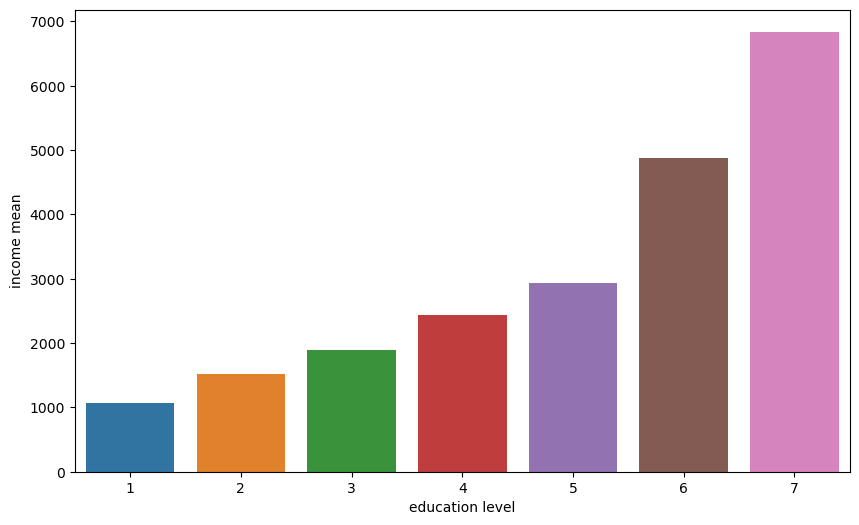

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='education_level', y='income', data=df_n, ci=None)
plt.xlabel('education level')
plt.ylabel('income mean')
plt.show()

#df_n['education_level'] = df_n['education_level'].replace({4:})

## Categorical encoding

In [41]:
w_category = ['region', 'marriage', 'occupation', 'gender','age']
df_w[w_category] = df_w[w_category].astype('object')
w_num=['family_member', 'education_level','company_size']

n_category = ['region', 'marriage', 'reason_none_worker', 'gender', 'age']
n_num=['family_member', 'education_level']
df_n[n_category] = df_n[n_category].astype('object')

C:\Users\USER\AppData\Local\Temp\ipykernel_12980\1722494933.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n[n_category] = df_n[n_category].astype('object')


<AxesSubplot:>

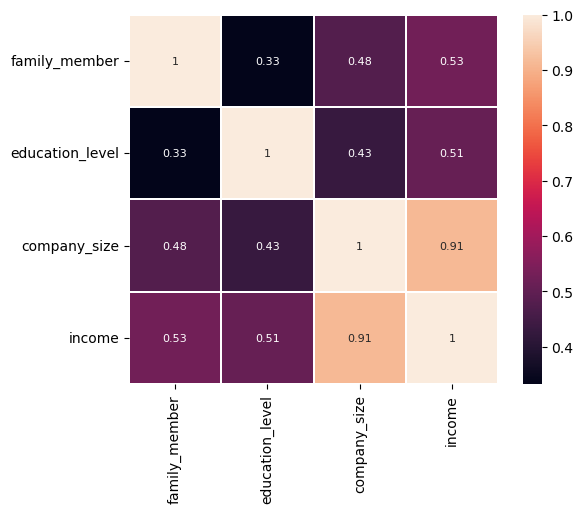

In [42]:
corr = df_w.corr()
sns.heatmap(corr, linewidths = 0.1, vmax = 1.0, square = True, linecolor = 'white', annot = True, annot_kws = {'size':8})

<AxesSubplot:>

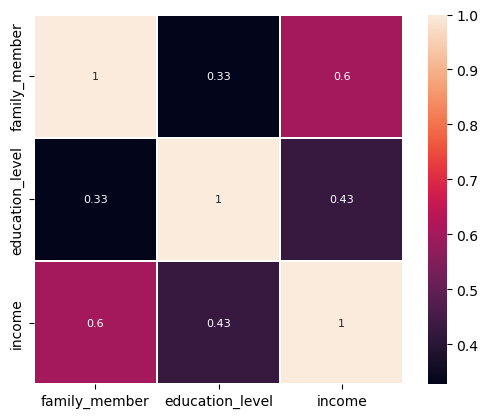

In [43]:
corr = df_n.corr()
sns.heatmap(corr, linewidths = 0.1, vmax = 1.0, square = True, linecolor = 'white', annot = True, annot_kws = {'size':8})

In [44]:
df_w_dum = pd.get_dummies(df_w[w_category])
df_n_dum = pd.get_dummies(df_n[n_category])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [45]:
data_w = pd.DataFrame()
data_w = pd.concat([df_w_dum, df_w[w_num], df_w['income']], axis=1)

In [46]:
data_w

,region_0,region_1,marriage_1,marriage_2,marriage_3,marriage_5,marriage_6,occupation_1,occupation_2,occupation_3,...,age_25-29,age_30-34,age_35-39,age_40-49,age_50-59,age_60+,family_member,education_level,company_size,income
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,618.279570
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,3,5,1,3108.932462
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,5,2,3,4771.968854
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3,3,1,1925.641026
7,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,4,5,6,8909.378293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78920,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,5,4,1,2096.774194
78921,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,3,1,3757.820383
78923,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,4,4,6,7512.820513
78924,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,4,4,3,4919.842313


In [47]:
data_n = pd.DataFrame()
data_n = pd.concat([df_n_dum, df_n[n_num], df_n['income']], axis=1)

In [48]:
data_n

,region_0,region_1,marriage_1,marriage_2,marriage_3,marriage_5,marriage_6,reason_none_worker_1,reason_none_worker_10,reason_none_worker_11,...,age_19-24,age_25-29,age_30-34,age_35-39,age_40-49,age_50-59,age_60+,family_member,education_level,income
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,4,1728.557013
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,2,1,1647.540984
10,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,2,592.473118
17,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,2,2,1058.401639
19,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2,49.731183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78917,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,664.102564
78918,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,1,2,1835.616438
78922,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,3124.217119
78925,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,1,3728.569271


# 모델 

In [49]:
seed = 42
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# pycaret을 이용하여 최적의 파라미터와 모델 찾기

In [93]:
from pycaret.regression import *
ixi_model = setup(session_id=seed, data=data_w, target='income', normalize=True, normalize_method='zscore', transformation=True, fold=10)

,Description,Value
0,Session id,42
1,Target,income
2,Target type,Regression
3,Original data shape,"(47326, 29)"
4,Transformed data shape,"(47326, 29)"
5,Transformed train set shape,"(33128, 29)"
6,Transformed test set shape,"(14198, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


In [51]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,635.7349,791841.9702,889.7529,0.8833,0.3149,0.2581,1.0700
catboost,CatBoost Regressor,637.5124,795956.3828,892.0366,0.8827,0.3143,0.2582,2.5770
xgboost,Extreme Gradient Boosting,639.1018,803176.6688,896.0694,0.8817,0.3147,0.2576,1.3630
gbr,Gradient Boosting Regressor,648.5486,808583.5662,899.1221,0.8808,0.3193,0.2645,1.2370
rf,Random Forest Regressor,644.5292,841903.2080,917.4267,0.8759,0.3174,0.2573,1.9800
et,Extra Trees Regressor,655.7130,877361.4037,936.5120,0.8707,0.3256,0.2597,1.9710
dt,Decision Tree Regressor,664.8179,905213.3831,951.2430,0.8666,0.3304,0.2619,1.0050
ada,AdaBoost Regressor,717.4254,916500.3220,957.2787,0.8649,0.3600,0.3155,1.0270
ridge,Ridge Regression,844.3880,1152379.3610,1073.3018,0.8302,0.3412,0.3038,0.9820
lr,Linear Regression,844.3828,1152605.3197,1073.4068,0.8302,0.3411,0.3037,1.6330


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

LGBMRegressor(random_state=42)

In [52]:
lgbm = create_model('lightgbm', usegpu=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,632.2914,784705.4406,885.8360,0.8848,0.3041,0.2422
1,655.1773,856996.4196,925.7410,0.8782,0.3244,0.2753
2,625.9154,757313.4404,870.2376,0.8843,0.3438,0.2574
3,629.1635,790246.8443,888.9583,0.8827,0.3078,0.3150
4,633.5398,798478.1383,893.5760,0.8835,0.3078,0.2466
5,632.2728,775682.1542,880.7282,0.8845,0.3134,0.2494
6,637.5528,784001.8235,885.4388,0.8827,0.3185,0.2503
7,642.2726,793385.6781,890.7220,0.8832,0.3180,0.2676
8,636.6671,785843.2008,886.4780,0.8838,0.3051,0.2377


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [53]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'usegpu': True}

In [99]:
lgbm_w_tuned = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,726.2641,1272305.6193,1127.9653,0.5051,0.5933,0.5932
1,705.5432,1197962.5815,1094.5148,0.4893,0.5806,0.8730
2,736.2027,1329241.3713,1152.9273,0.5127,0.5748,0.8134
3,689.7531,1122100.0340,1059.2922,0.4665,0.5638,0.5476
4,695.8930,1183984.4639,1088.1105,0.4785,0.5754,0.8592
5,706.9519,1223395.5090,1106.0721,0.4629,0.5796,1.2432
6,717.5186,1191918.3436,1091.7501,0.5007,0.5890,0.7219
7,670.3074,1111456.7083,1054.2565,0.5217,0.5887,0.5843
8,721.0319,1291741.5248,1136.5481,0.4842,0.5780,0.5305


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [100]:
lgbm_w_tuned.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'usegpu': True}

In [94]:
cat_w = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,636.1383,792308.7939,890.1173,0.8837,0.3037,0.2427
1,660.7100,867201.1673,931.2364,0.8767,0.3252,0.2779
2,623.8706,754208.2330,868.4516,0.8848,0.3416,0.2542
3,630.8520,792182.1000,890.0461,0.8824,0.3069,0.3193
4,637.8065,805438.1974,897.4621,0.8825,0.3088,0.2479
5,632.8290,776221.2979,881.0342,0.8845,0.3125,0.2488
6,639.2751,789443.5292,888.5063,0.8819,0.3185,0.2501
7,642.6829,797287.3947,892.9095,0.8826,0.3171,0.2679
8,638.1421,793135.4001,890.5815,0.8828,0.3041,0.2360


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [95]:
cat_w_tuned = tune_model(cat_w)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,641.6271,797032.5273,892.7668,0.8830,0.3079,0.2479
1,665.5508,863499.5420,929.2468,0.8773,0.3272,0.2815
2,634.6984,765913.2303,875.1647,0.8830,0.3461,0.2607
3,637.5373,799611.3587,894.2099,0.8813,0.3111,0.3206
4,643.7464,814548.2542,902.5233,0.8812,0.3124,0.2534
5,645.1801,793724.4221,890.9121,0.8819,0.3175,0.2554
6,649.0176,798157.6471,893.3967,0.8806,0.3233,0.2566
7,646.9585,793898.6021,891.0099,0.8831,0.3214,0.2727
8,651.8507,806473.1508,898.0385,0.8808,0.3114,0.2454


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [96]:
model = setup(session_id=seed, data=data_n, target='income', normalize=False, transformation=True, fold=10)

,Description,Value
0,Session id,42
1,Target,income
2,Target type,Regression
3,Original data shape,"(27180, 29)"
4,Transformed data shape,"(27180, 29)"
5,Transformed train set shape,"(19026, 29)"
6,Transformed test set shape,"(8154, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


In [55]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,707.7439,1213641.7159,1101.0872,0.4987,0.5824,0.8098,0.9590
catboost,CatBoost Regressor,710.3372,1224490.0525,1106.0664,0.4939,0.5842,0.8073,1.9200
gbr,Gradient Boosting Regressor,721.1095,1241205.7065,1113.4158,0.4876,0.5880,0.8223,1.0820
xgboost,Extreme Gradient Boosting,716.7433,1261693.4500,1122.7785,0.4784,0.5891,0.8084,1.1920
rf,Random Forest Regressor,716.1921,1267256.1835,1125.2060,0.4764,0.5862,0.7979,1.2180
et,Extra Trees Regressor,728.0331,1333156.5483,1154.1434,0.4486,0.6015,0.8311,1.2750
dt,Decision Tree Regressor,741.2363,1421921.9868,1191.8768,0.4115,0.6169,0.8964,0.9050
knn,K Neighbors Regressor,768.1655,1436852.7375,1197.9080,0.4068,0.6204,0.8585,0.9710
br,Bayesian Ridge,808.0177,1471660.0574,1211.8894,0.3935,0.6831,0.8621,0.9020
lr,Linear Regression,808.1307,1471920.4203,1212.0009,0.3934,0.6856,0.8728,0.9500


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

LGBMRegressor(random_state=42)

In [56]:
lgbm_n = create_model('lightgbm', usegpu=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,733.4282,1302074.7312,1141.0849,0.4936,0.5968,0.6108
1,700.2785,1180555.5281,1086.5337,0.4968,0.5791,0.8742
2,730.2728,1322303.8420,1149.9147,0.5152,0.5708,0.8076
3,685.9380,1103901.0875,1050.6670,0.4752,0.5620,0.5475
4,689.7276,1177697.8869,1085.2179,0.4813,0.5710,0.8304
5,702.2410,1186249.1128,1089.1506,0.4792,0.5757,1.1920
6,713.4134,1181802.3305,1087.1073,0.5049,0.5856,0.7073
7,667.9898,1101945.8051,1049.7361,0.5258,0.5876,0.5775
8,713.0879,1272138.4506,1127.8912,0.4920,0.5747,0.5298


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [57]:
lgbm_n.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'usegpu': True}

In [101]:
lgbm_n_tuned = tune_model(lgbm_n)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,726.2641,1272305.6193,1127.9653,0.5051,0.5933,0.5932
1,705.5432,1197962.5815,1094.5148,0.4893,0.5806,0.8730
2,736.2027,1329241.3713,1152.9273,0.5127,0.5748,0.8134
3,689.7531,1122100.0340,1059.2922,0.4665,0.5638,0.5476
4,695.8930,1183984.4639,1088.1105,0.4785,0.5754,0.8592
5,706.9519,1223395.5090,1106.0721,0.4629,0.5796,1.2432
6,717.5186,1191918.3436,1091.7501,0.5007,0.5890,0.7219
7,670.3074,1111456.7083,1054.2565,0.5217,0.5887,0.5843
8,721.0319,1291741.5248,1136.5481,0.4842,0.5780,0.5305


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [97]:
cat_n = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,729.2070,1292649.6442,1136.9475,0.4972,0.5944,0.5987
1,699.6796,1196873.3820,1094.0171,0.4898,0.5775,0.8489
2,730.4653,1301694.9665,1140.9185,0.5228,0.5726,0.8158
3,690.7720,1123805.0274,1060.0967,0.4657,0.5636,0.5501
4,694.1257,1189966.7017,1090.8559,0.4759,0.5752,0.8525
5,707.9891,1224722.6874,1106.6719,0.4623,0.5778,1.1468
6,712.7597,1178126.7894,1085.4155,0.5064,0.5874,0.7087
7,671.3418,1109994.8378,1053.5629,0.5224,0.5900,0.5822
8,724.8938,1321836.2517,1149.7114,0.4721,0.5823,0.5378


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [98]:
cat_n_tuned = tune_model(cat_n)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,753.0016,1356026.7442,1164.4856,0.4726,0.6020,0.6070
1,716.1432,1213460.5312,1101.5718,0.4827,0.5872,0.9153
2,740.7463,1344757.4530,1159.6368,0.5070,0.5837,0.8278
3,696.2668,1110766.6257,1053.9291,0.4719,0.5685,0.5601
4,701.9671,1232489.5599,1110.1755,0.4571,0.5767,0.9350
5,711.1535,1198662.1290,1094.8343,0.4738,0.5813,1.1783
6,723.9376,1211473.1391,1100.6694,0.4925,0.5903,0.7159
7,691.6868,1148523.0530,1071.6917,0.5058,0.6002,0.5972
8,733.5608,1319938.8972,1148.8859,0.4729,0.5830,0.5441


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [62]:
seed = 42
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [63]:
from sklearn.preprocessing import StandardScaler

x_w = data_w.drop(columns=['income'], axis=1)
y_w = data_w['income']

xw_train, xw_test, yw_train, yw_test = train_test_split(x_w,
                                                    y_w,
                                                    test_size=0.3,
                                                    random_state=seed)

#print(xw_train.shape, yw_train.shape)

ss = StandardScaler() # 정규화를 위한 과정입니다.
xw_train = ss.fit_transform(xw_train)
xw_test = ss.fit_transform(xw_test)

In [64]:
x_n = data_n.drop(columns=['income'], axis=1)
y_n = data_n['income']

xn_train, xn_test, yn_train, yn_test = train_test_split(x_n,
                                                    y_n,
                                                    test_size=0.3,
                                                    random_state=seed)

#print(xn_train.shape, yn_train.shape)

ss = StandardScaler() # 정규화를 위한 과정입니다.
xn_train = ss.fit_transform(xn_train)
xn_test = ss.fit_transform(xn_test)

In [ ]:
error

## lightGBM

### 재직자의 경우

In [71]:
import lightgbm as lgb

model_l = lgb.LGBMRegressor()

param_l = {
        'boosting_type': ['gbdt'],
        'class_weight': [None],
        'colsample_bytree': [1.0],
        'importance_type': ['split'],
        'learning_rate': [0.1],
        'max_depth': [-1],
        'min_child_samples': [20],
        'min_child_weight': [0.001],
        'min_split_gain': [0.0],
        'n_estimators': [100],
        'n_jobs': [-1],
        'num_leaves': [31],
        'objective': ['regression'],# 이건 건들지 말아주세요
        'random_state': [42],
        'reg_alpha': [0.0],
        'reg_lambda': [0.0],
        'subsample': [1.0],
        'subsample_for_bin': [200000],
        'subsample_freq': [0],
        'usegpu': [True],
        'metric': ['rmse']  # 평가지표입니다. 건들지 말아ㅜㅈ세요
        }

lgb_grid = GridSearchCV(model_l,
                        param_l,
                        cv=5,
                        n_jobs=-1,
                        verbose=2,
                        scoring='neg_root_mean_squared_error')

In [72]:
lgb_grid.fit(xw_train, yw_train)
# print(lgb_grid.best_params_)
# print(lgb_grid.best_score_ * -1)

y_pred_w_l = lgb_grid.predict(xw_test)
RMSE_l = mean_squared_error(yw_test, y_pred_w_l)**0.5
RMSE_l

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] Unknown parameter: usegpu


883.6571667294746

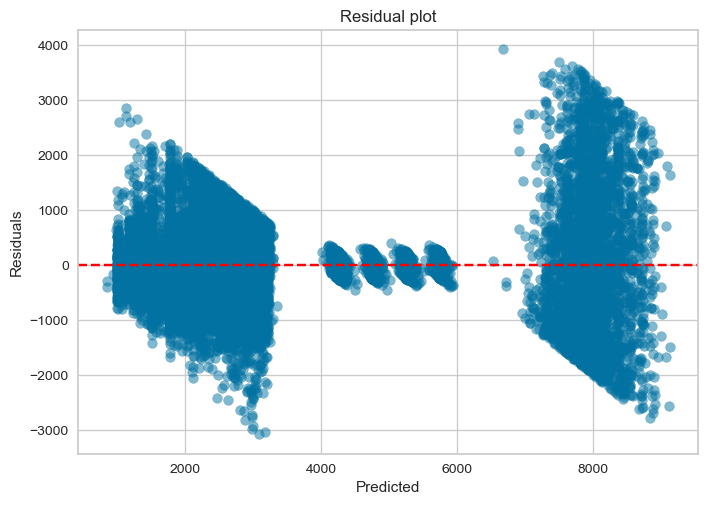

In [73]:
# 예측값과 실제값의 residual 계산
residuals_w_l = yw_test - y_pred_w_l

# residual plot 그리기
plt.scatter(y_pred_w_l, residuals_w_l, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

### 무직자의 경우

In [74]:
import lightgbm as lgb

model_l_n = lgb.LGBMRegressor()

param_l_n = {
 'boosting_type': ['gbdt'],
 'class_weight': [None],
 'colsample_bytree': [1.0],
 'importance_type': ['split'],
 'learning_rate': [0.1],
 'max_depth': [-1],
 'min_child_samples': [20],
 'min_child_weight': [0.001],
 'min_split_gain': [0.0],
 'n_estimators': [100],
 'n_jobs': [-1],
 'num_leaves': [31],
 'objective': ['regression'],
 'random_state': [42],
 'reg_alpha': [0.0],
 'reg_lambda': [0.0],
 'silent': ['warn'],
 'subsample': [1.0],
 'subsample_for_bin': [200000],
 'subsample_freq': [0],
 'usegpu': [True],
 'metric': ['rmse']  # 평가지표입니다. 건들지 말아ㅜㅈ세요
}

lgb_grid_n = GridSearchCV(model_l_n,
                        param_l,
                        cv=5,
                        n_jobs=-1,
                        verbose=2,
                        scoring='neg_root_mean_squared_error')

In [75]:
lgb_grid.fit(xn_train, yn_train)
# print(lgb_grid.best_params_)
# print(lgb_grid.best_score_ * -1)
y_pred_n_l = lgb_grid.predict(xn_test)
RMSE_l_n = mean_squared_error(yn_test, y_pred_n_l)**0.5
RMSE_l_n

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] Unknown parameter: usegpu


1100.5016803550334

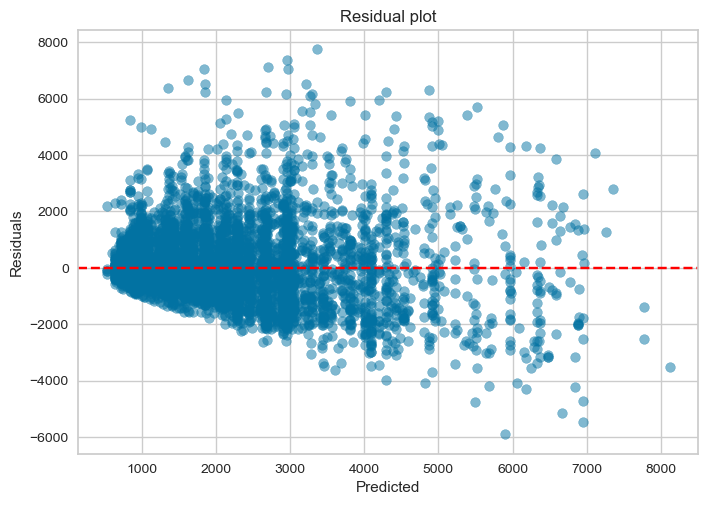

In [76]:
# 예측값과 실제값의 residual 계산
residuals_n_l = yn_test - y_pred_n_l

# residual plot 그리기
plt.scatter(y_pred_n_l, residuals_n_l, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

## CatBoost

### 재직자의 경우

In [77]:
!pip install catboost

In [78]:
default_cat = create_model('catboost')
tuned_cat = tune_model(default_cat, n_iter=10, optimize='RMSE')
tuned_cat

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,729.2070,1292649.6442,1136.9475,0.4972,0.5944,0.5987
1,699.6796,1196873.3820,1094.0171,0.4898,0.5775,0.8489
2,730.4653,1301694.9665,1140.9185,0.5228,0.5726,0.8158
3,690.7720,1123805.0274,1060.0967,0.4657,0.5636,0.5501
4,694.1257,1189966.7017,1090.8559,0.4759,0.5752,0.8525
5,707.9891,1224722.6874,1106.6719,0.4623,0.5778,1.1468
6,712.7597,1178126.7894,1085.4155,0.5064,0.5874,0.7087
7,671.3418,1109994.8378,1053.5629,0.5224,0.5900,0.5822
8,724.8938,1321836.2517,1149.7114,0.4721,0.5823,0.5378


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,753.0016,1356026.7442,1164.4856,0.4726,0.6020,0.6070
1,716.1432,1213460.5312,1101.5718,0.4827,0.5872,0.9153
2,740.7463,1344757.4530,1159.6368,0.5070,0.5837,0.8278
3,696.2668,1110766.6257,1053.9291,0.4719,0.5685,0.5601
4,701.9671,1232489.5599,1110.1755,0.4571,0.5767,0.9350
5,711.1535,1198662.1290,1094.8343,0.4738,0.5813,1.1783
6,723.9376,1211473.1391,1100.6694,0.4925,0.5903,0.7159
7,691.6868,1148523.0530,1071.6917,0.5058,0.6002,0.5972
8,733.5608,1319938.8972,1148.8859,0.4729,0.5830,0.5441


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [79]:
from catboost import CatBoostRegressor, Pool

model_c = CatBoostRegressor()
param_c = {
    'learning_rate': [0.001, 0.1,0.3],
    'n_estimators': [100,500,1000],
    'max_depth': [4,8,12],
    'loss_function': ['RMSE'],  # 평가지표입니다. 건들지 말아주세요.
    'colsample_bylevel': [0.5]
}
cat_grid = GridSearchCV(model_c,
                        param_c,
                        cv=5,
                        n_jobs=-1,
                        verbose=2,
                        scoring='neg_root_mean_squared_error')

In [80]:
cat_grid.fit(xw_train, yw_train)
#print(cat_grid.best_params_)
#print(cat_grid.best_score_ * -1)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 2389.7323826	total: 4.7ms	remaining: 465ms
1:	learn: 2189.6092656	total: 13.7ms	remaining: 669ms
2:	learn: 2015.8768952	total: 16.7ms	remaining: 540ms
3:	learn: 1861.1230515	total: 25ms	remaining: 599ms
4:	learn: 1725.4595594	total: 28.7ms	remaining: 545ms
5:	learn: 1608.2517009	total: 41.5ms	remaining: 650ms
6:	learn: 1502.5870063	total: 54.9ms	remaining: 729ms
7:	learn: 1411.1755615	total: 68.8ms	remaining: 791ms
8:	learn: 1332.3345466	total: 72.1ms	remaining: 729ms
9:	learn: 1262.8480263	total: 81.8ms	remaining: 736ms
10:	learn: 1204.4357735	total: 84.8ms	remaining: 686ms
11:	learn: 1153.4605238	total: 98.1ms	remaining: 719ms
12:	learn: 1110.4460871	total: 113ms	remaining: 759ms
13:	learn: 1076.0015226	total: 116ms	remaining: 714ms
14:	learn: 1047.7641447	total: 120ms	remaining: 682ms
15:	learn: 1023.0689811	total: 125ms	remaining: 656ms
16:	learn: 999.9105069	total: 138ms	remaining: 673ms
17:	learn: 981.4784269

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001F468449640>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.5],
                         'learning_rate': [0.001, 0.1, 0.3],
                         'loss_function': ['RMSE'], 'max_depth': [4, 8, 12],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [81]:
y_pred_c_w = cat_grid.predict(xw_test)
RMSE_c_w = mean_squared_error(yw_test, y_pred_c_w)**0.5
RMSE_c_w

879.4168011327557

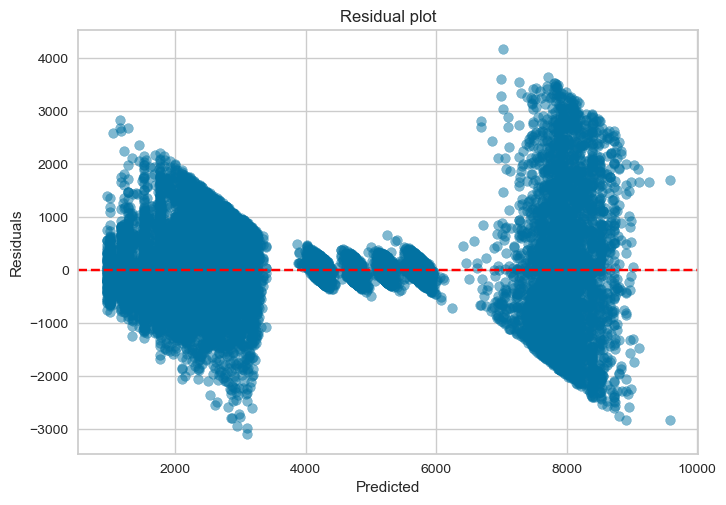

In [82]:
# 예측값과 실제값의 residual 계산
residuals_w_c = yw_test - y_pred_c_w

# residual plot 그리기
plt.scatter(y_pred_c_w, residuals_w_c, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

### 무직자의 경우

In [83]:
model_c_n = CatBoostRegressor()
param_c_n = {
    'learning_rate': [0.001, 0.1,0.3],
    'n_estimators': [100,500,1000],
    'max_depth': [4,8,12],
    'loss_function': ['RMSE'],  # 평가지표입니다. 건들지 말아주세요.
    'colsample_bylevel': [0.5]
}
cat_grid_n = GridSearchCV(model_c_n,
                        param_c_n,
                        cv=5,
                        n_jobs=-1,
                        verbose=2,
                        scoring='neg_root_mean_squared_error')

In [84]:
cat_grid.fit(xn_train, yn_train)
#print(cat_grid.best_params_)
#print(cat_grid.best_score_ * -1)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 1492.6201035	total: 3.1ms	remaining: 307ms
1:	learn: 1438.3449144	total: 6.31ms	remaining: 309ms
2:	learn: 1389.9360282	total: 9.35ms	remaining: 302ms
3:	learn: 1347.6008930	total: 12.4ms	remaining: 298ms
4:	learn: 1312.5550468	total: 15.8ms	remaining: 301ms
5:	learn: 1283.8248396	total: 18.9ms	remaining: 296ms
6:	learn: 1259.4492290	total: 22.2ms	remaining: 294ms
7:	learn: 1237.2661679	total: 25.2ms	remaining: 289ms
8:	learn: 1215.8988527	total: 28ms	remaining: 283ms
9:	learn: 1199.1550471	total: 31ms	remaining: 279ms
10:	learn: 1184.2740716	total: 34ms	remaining: 275ms
11:	learn: 1172.6371412	total: 37.3ms	remaining: 273ms
12:	learn: 1163.1484153	total: 40.4ms	remaining: 270ms
13:	learn: 1157.8212434	total: 42.3ms	remaining: 260ms
14:	learn: 1151.0184250	total: 44.8ms	remaining: 254ms
15:	learn: 1143.1504894	total: 47.4ms	remaining: 249ms
16:	learn: 1136.3176252	total: 50.3ms	remaining: 246ms
17:	learn: 1130.5443

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001F468449640>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.5],
                         'learning_rate': [0.001, 0.1, 0.3],
                         'loss_function': ['RMSE'], 'max_depth': [4, 8, 12],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [85]:
y_pred_c_n = cat_grid.predict(xn_test)
RMSE_c_n = mean_squared_error(yn_test, y_pred_c_n)**0.5
RMSE_c_n

1095.043379807112

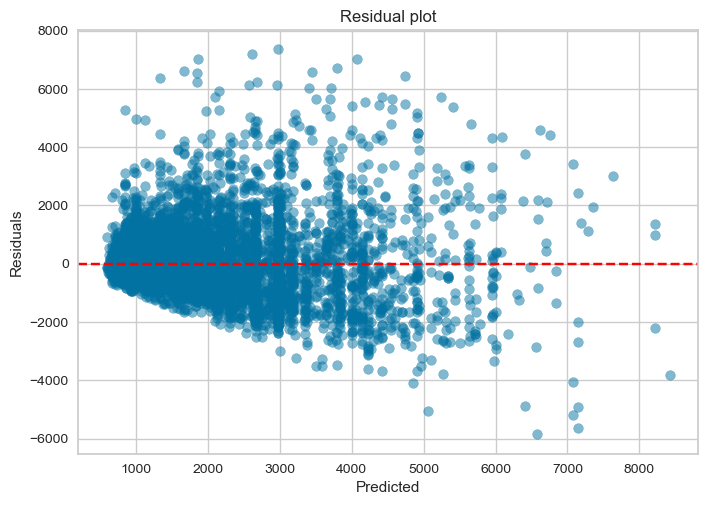

In [86]:
# 예측값과 실제값의 residual 계산
residuals_n_c = yn_test - y_pred_c_n

# residual plot 그리기
plt.scatter(y_pred_c_n, residuals_n_c, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

## 이 외 추가적인 데이터 변경 시도
### company size
* company size를 소중대로 나누어 시도

### marriage 
* 비슷한 분류와 범주를 합쳐서 시도

### reason_non_worker
* 데이터 양이 적은 범주를 합쳐서 시도

### family size
* 다수, 소수로 범주를 합쳐서 시도

## 수많은 하이퍼파라미터 변경 시도